# Load Dataset 

In [1]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.svm import OneClassSVM
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, classification_report, f1_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np 


In [2]:
dataset = pd.read_csv("Malware_Dataset.csv")

In [3]:
dataset.head()

,Category,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.nprocs64bit,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,...,svcscan.kernel_drivers,svcscan.fs_drivers,svcscan.process_services,svcscan.shared_process_services,svcscan.interactive_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric,Class
0,Benign,45,17,10.555556,0,202.844444,1694,38.500000,9129,212.302326,...,221,26,24,116,0,121,87,0,8,Benign
1,Benign,47,19,11.531915,0,242.234043,2074,44.127660,11385,242.234043,...,222,26,24,118,0,122,87,0,8,Benign
2,Benign,40,14,14.725000,0,288.225000,1932,48.300000,11529,288.225000,...,222,26,27,118,0,120,88,0,8,Benign
3,Benign,32,13,13.500000,0,264.281250,1445,45.156250,8457,264.281250,...,222,26,27,118,0,120,88,0,8,Benign
4,Benign,42,16,11.452381,0,281.333333,2067,49.214286,11816,281.333333,...,222,26,24,118,0,124,87,0,8,Benign


# Process Dataset 

In [4]:
df = dataset.drop(['Category'], axis=1)
df['Class'] = df['Class'].replace(['Malware', 'Benign'], [1, 0]) 

In [5]:
## deleting random rows in dataset, to make the malware samples more anomolous. 
malware_samples_indices = df[df['Class'] == 1].index
num_rows_to_delete = int(0.8 * len(malware_samples_indices))
rows_to_delete = np.random.choice(malware_samples_indices, size=num_rows_to_delete, replace=False)


In [6]:
df = df.drop(rows_to_delete)

In [7]:
print(df['Class'].value_counts())

0    29298
1     5860
Name: Class, dtype: int64


In [8]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [9]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=0.2, random_state=42)

In [29]:
accuracies = []
precisions = []
recalls = []
f1_scores = [] 


# Train and Evaluate Models

In [10]:
## Isolation Forest
Isolation_Forest_model=IsolationForest(max_samples= 100, n_estimators= 200, contamination=0.2, bootstrap = True)
Isolation_Forest_model.fit(Xtrain)

IsolationForest(bootstrap=True, contamination=0.2, max_samples=100,
                n_estimators=200)

In [11]:
predictions = Isolation_Forest_model.predict(Xtest)
print(predictions)

[ 1  1  1 ...  1  1 -1]


In [12]:
print(pd.value_counts(predictions))

 1    5693
-1    1339
dtype: int64


In [13]:
predictions[predictions== 1] = 0
predictions[predictions== -1] = 1

In [14]:
print(pd.value_counts(predictions))

0    5693
1    1339
dtype: int64


In [15]:
Isolation_forest_classification_report = classification_report(predictions, ytest)
print(Isolation_forest_classification_report)

              precision    recall  f1-score   support

           0       0.84      0.87      0.85      5693
           1       0.34      0.30      0.32      1339

    accuracy                           0.76      7032
   macro avg       0.59      0.58      0.59      7032
weighted avg       0.75      0.76      0.75      7032



In [30]:
Isolation_forest_accuracy = accuracy_score(predictions, ytest)
Isolation_forest_precision = precision_score(predictions, ytest)
Isolation_forest_recall = recall_score(predictions, ytest)
Isolation_forest_f1_score = f1_score(predictions, ytest)

print(Isolation_forest_accuracy)
print(Isolation_forest_precision)
print(Isolation_forest_recall)
print(Isolation_forest_f1_score)

0.757679180887372
0.3438836612489307
0.30022404779686335
0.32057416267942584


In [31]:
accuracies.append(Isolation_forest_accuracy)
precisions.append(Isolation_forest_precision)
recalls.append(Isolation_forest_recall)
f1_scores.append(Isolation_forest_f1_score)

In [16]:
cm_isolation_forest = confusion_matrix(predictions, ytest)

In [17]:
print(cm_isolation_forest)

[[4926  767]
 [ 937  402]]


<Axes: >

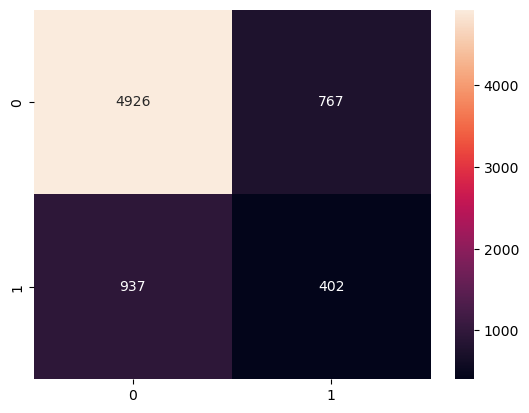

In [18]:
import seaborn as sns
sns.heatmap(cm_isolation_forest, fmt='2', annot=True)

In [19]:
## local Outlier Factor 
Local_outlier_factor = LocalOutlierFactor(n_neighbors = 100, algorithm='auto', contamination=0.2, novelty=True)
Local_outlier_factor.fit(Xtrain)

LocalOutlierFactor(contamination=0.2, n_neighbors=100, novelty=True)

In [20]:
LOF_predictions = Local_outlier_factor.predict(Xtest)

In [21]:
LOF_predictions[LOF_predictions== 1] = 0
LOF_predictions[LOF_predictions== -1] = 1

print(pd.value_counts(LOF_predictions))

0    5618
1    1414
dtype: int64


In [22]:
LOF_classification_report = classification_report(LOF_predictions, ytest)
print(LOF_classification_report)

              precision    recall  f1-score   support

           0       0.80      0.83      0.81      5618
           1       0.19      0.15      0.17      1414

    accuracy                           0.69      7032
   macro avg       0.49      0.49      0.49      7032
weighted avg       0.67      0.69      0.68      7032



In [32]:
LOF_accuracy = accuracy_score(LOF_predictions, ytest)
LOF_precision = precision_score(LOF_predictions, ytest)
LOF_recall = recall_score(LOF_predictions, ytest)
LOF_f1_score = f1_score(LOF_predictions, ytest)

print(LOF_accuracy)
print(LOF_precision)
print(LOF_recall)
print(LOF_f1_score)

0.6949658703071673
0.18733960650128315
0.15487977369165487
0.16957026713124274


In [33]:
accuracies.append(LOF_accuracy)
precisions.append(LOF_precision)
recalls.append(LOF_recall)
f1_scores.append(LOF_f1_score)

<Axes: >

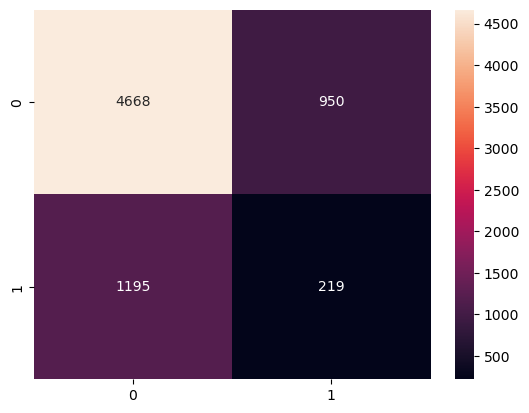

In [23]:
confusion_matrix_LOF = confusion_matrix(LOF_predictions, ytest)
sns.heatmap(confusion_matrix_LOF, fmt='2', annot=True)

In [24]:
## One Class SVM 
## train and test
one_class_svm = OneClassSVM()
one_class_svm.fit(Xtrain)

OneClassSVM()

In [25]:
one_class_svm_predictions=one_class_svm.predict(Xtest)

In [26]:
one_class_svm_predictions[one_class_svm_predictions== 1] = 0
one_class_svm_predictions[one_class_svm_predictions== -1] = 1

print(pd.value_counts(one_class_svm_predictions))

0    3574
1    3458
dtype: int64


In [27]:
SVM_classification_report = classification_report(one_class_svm_predictions, ytest)
print(SVM_classification_report)

              precision    recall  f1-score   support

           0       0.61      1.00      0.76      3574
           1       1.00      0.34      0.50      3458

    accuracy                           0.67      7032
   macro avg       0.80      0.67      0.63      7032
weighted avg       0.80      0.67      0.63      7032



In [34]:
OC_SVM_accuracy = accuracy_score(one_class_svm_predictions, ytest)
OC_SVM_precision = precision_score(one_class_svm_predictions, ytest)
OC_SVM_recall = recall_score(one_class_svm_predictions, ytest)
OC_SVM_f1_score = f1_score(one_class_svm_predictions, ytest)

print(OC_SVM_accuracy)
print(OC_SVM_precision)
print(OC_SVM_recall)
print(OC_SVM_f1_score)

0.67306598407281
0.9957228400342173
0.3366107576633892
0.5031337799870326


In [35]:
accuracies.append(OC_SVM_accuracy)
precisions.append(OC_SVM_precision)
recalls.append(OC_SVM_recall)
f1_scores.append(OC_SVM_f1_score)

<Axes: >

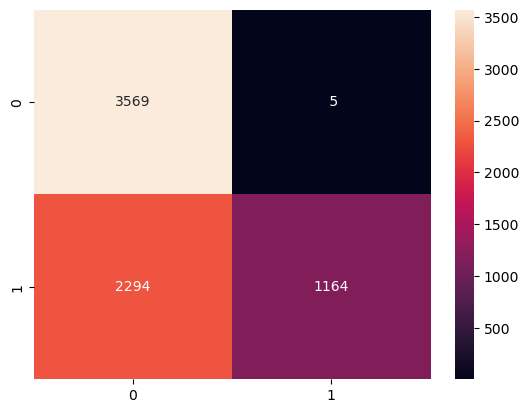

In [28]:
SVM_confusion_matrix = confusion_matrix(one_class_svm_predictions, ytest)
sns.heatmap(SVM_confusion_matrix, fmt='2', annot=True)

# Evaluation Table

In [ ]:
## All models have been trained and evaluated, now the final evaluation table will be generated

In [37]:
Evaluation_Table = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1-Score'])


Evaluation_Table = pd.concat([Evaluation_Table, pd.DataFrame({
    "Accuracy": accuracies,
    "Precision": precisions,
    "Recall": recalls,
    "F1-Score": f1_scores
})], ignore_index=True)

Evaluation_Table.index = ['Isolation Forest', 'Local Outlier Factor', 'One Class SVM']
Evaluation_Table.index.names = ['Models']

In [38]:
Evaluation_Table

,Accuracy,Precision,Recall,F1-Score
Models,,,,
Isolation Forest,0.757679,0.343884,0.300224,0.320574
Local Outlier Factor,0.694966,0.187340,0.154880,0.169570
One Class SVM,0.673066,0.995723,0.336611,0.503134
